In [132]:
#importing 
import pandas as pd
from pathlib import Path
import numpy as np

In [133]:
#importing csv data
csvluxury = Path("Luxury_goods.csv")
csvbigmac1 = Path("big_mac_index/big-mac-full-index.csv")
csvpriceindex = Path("price_index_by_city/PropertyPriceIndexByCity_2021.csv")

In [155]:
#reading in price index for 2021
data_priceindex = pd.read_csv(csvpriceindex)
data_priceindex = data_priceindex[["City", "Price To Income Ratio", "Mortgage As A Percentage Of Income", "Affordability Index"]]
#splitting city into 3 new columns, city, state, country. filling country NanN value with the values in the state column then groupby 
data_priceindex[["city","state","country"]] = data_priceindex["City"].str.split(",", expand = True)
data_priceindex.replace(to_replace=[None], value=np.nan, inplace=True)
data_priceindex.loc[data_priceindex['country'].isnull(),'country'] = data_priceindex['state']
data_priceindex = data_priceindex[["country","Price To Income Ratio", "Mortgage As A Percentage Of Income", "Affordability Index"]].groupby("country").mean()
data_priceindex

Price To Income Ratio  Mortgage As A Percentage Of Income  \
country                                                                      
 Afghanistan                 12.030000                          159.320000   
 Albania                     16.210000                          126.680000   
 Algeria                     26.330000                          241.730000   
 Argentina                   24.610000                         1124.460000   
 Armenia                     17.790000                          224.230000   
...                                ...                                 ...   
 United Kingdom               9.683333                           64.847778   
 United States                4.403120                           32.252000   
 Uruguay                     16.750000                          164.200000   
 Uzbekistan                  15.160000                          332.960000   
 Vietnam                     20.055000                          215.675000   

                 Affordability Index  
country                               
 Afghanistan                0.630000  
 Albania                    0.790000  
 Algeria                    0.410000  
 Argentina                  0.090000  
 Armenia                    0.450000  
...                              ...  
 United Kingdom             1.644444  
 United States              4.016560  
 Uruguay                    0.610000  
 Uzbekistan                 0.300000  
 Vietnam                    0.470000  

[109 rows x 3 columns]

In [ ]:
# Data cleaning

In [22]:
## Reading and cleaning data for luxury goods

C:\Users\jacky\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:title={'center':'S&P Global Luxury Index from 10 - 21'}, xlabel='year'>

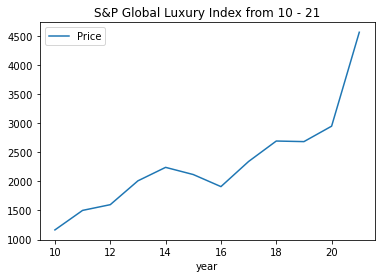

In [118]:
#reading data
data = pd.read_csv(csvluxury)

#slice data to get the Date and Price
data_1 = data.iloc[:, [0,1]]

#separate dates into month and year column
data_1[["month", "year"]] = data_1["Date"].str.split(" ", expand = True)

#setting price as float and removing comma
data_2 = data_1.drop(columns = ["Date", "month"])
data_2['Price'] = data_2['Price'].str.replace(',','')
data_2['Price'] = data_2['Price'].astype(float, errors = 'raise')

#groupby years for the average yearly price and dropping years that does not have 12 months of data
data_grp = data_2.groupby("year").mean()
luxury_data = data_grp.drop(index = ["09", "22"])
luxury_data.plot(title = "S&P Global Luxury Index from 10 - 21")

In [ ]:
# Reading and cleaning data for big mac index

<AxesSubplot:title={'center':'Australian big mac index from 2000 to 2021'}, xlabel='year'>

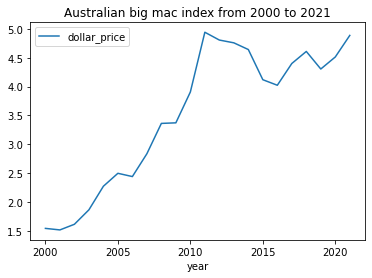

In [152]:
#reading in data
bigmac = pd.read_csv(csvbigmac1)
bigmac = bigmac.iloc[:, [0,3,6]]
bigmac.head()

#slicing date column by dates, country and calculating average prices
bigmac[["year", "month", "day"]] = bigmac["date"].str.split("-", expand = True)
bigmac = bigmac.drop(columns = ["date", "month", "day"]).set_index("name")

#average yearly price of big mac in Argentina 
ARG = bigmac.loc["Argentina"]
ARG.groupby("year").mean()

#average yearly price of big mac in Australia
AUS = bigmac.loc["Australia"]
AUS = AUS.groupby("year").mean()
AUS.plot(title = "Australian big mac index from 2000 to 2021")